1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования.
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [323]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [324]:
#установим параметры для будущих графиков
custom_params = {"axes.spines.right": False, "axes.spines.top": False,"axes.spines.left":False}
sns.set_theme(style="ticks", palette="pastel",color_codes=True)
plt.rcParams['figure.figsize'] = (8, 6)

In [325]:
#выгружаем датасет
data = pd.read_csv('air_data.csv', sep=';')

In [326]:
#просмотрим данные
data

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [327]:
#получим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


### **2**

In [328]:
#изменим тип данных в строках с датами на datetime64
data['ISSUE_DATE'] = pd.to_datetime(data['ISSUE_DATE'], dayfirst=True)
data['FLIGHT_DATE_LOC'] = pd.to_datetime(data['FLIGHT_DATE_LOC'], dayfirst=True)

In [329]:
#проверим, за какой период предоставлены данные
data['ISSUE_DATE'].max() - data['ISSUE_DATE'].min()

Timedelta('364 days 00:00:00')

In [330]:
#просмотрим полученный результат
data.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [331]:
#также проверим замену типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ISSUE_DATE         50000 non-null  datetime64[ns]
 1   FLIGHT_DATE_LOC    50000 non-null  datetime64[ns]
 2   PAX_TYPE           50000 non-null  object        
 3   REVENUE_AMOUNT     50000 non-null  int64         
 4   ORIG_CITY_CODE     49998 non-null  object        
 5   DEST_CITY_CODE     49999 non-null  object        
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object        
 7   FFP_FLAG           19398 non-null  object        
 8   SALE_TYPE          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [332]:
#заменим названия колонок
data.columns = ['Issue_date', 'Flight_date_loc', 'Pax_type', 'Revenue_amount',
       'Orig_city_code', 'Dest_city_code', 'Route_flight_type', 'FFP_flag',
       'Sale_type']

In [333]:
#удалим из датасета дубликаты
data = data.drop_duplicates()

In [334]:
#посмотрим на количество ненулевых значений в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49831 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         49831 non-null  datetime64[ns]
 1   Flight_date_loc    49831 non-null  datetime64[ns]
 2   Pax_type           49831 non-null  object        
 3   Revenue_amount     49831 non-null  int64         
 4   Orig_city_code     49829 non-null  object        
 5   Dest_city_code     49830 non-null  object        
 6   Route_flight_type  49831 non-null  object        
 7   FFP_flag           19362 non-null  object        
 8   Sale_type          49831 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [335]:
#удалим 2 строки с пустым значением города отправления
data = data.dropna(subset = 'Orig_city_code')

In [336]:
#удалим строку с пустым значением города назначения
data = data.dropna(subset = 'Dest_city_code')

In [337]:
#посмотрим получившиеся результаты
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49828 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         49828 non-null  datetime64[ns]
 1   Flight_date_loc    49828 non-null  datetime64[ns]
 2   Pax_type           49828 non-null  object        
 3   Revenue_amount     49828 non-null  int64         
 4   Orig_city_code     49828 non-null  object        
 5   Dest_city_code     49828 non-null  object        
 6   Route_flight_type  49828 non-null  object        
 7   FFP_flag           19362 non-null  object        
 8   Sale_type          49828 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [338]:
#заполним строки с отсутствующей программой лояльности как No FFP
data = data.fillna('No FFP')

In [339]:
#видим, что больше пустых значений нет
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49828 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         49828 non-null  datetime64[ns]
 1   Flight_date_loc    49828 non-null  datetime64[ns]
 2   Pax_type           49828 non-null  object        
 3   Revenue_amount     49828 non-null  int64         
 4   Orig_city_code     49828 non-null  object        
 5   Dest_city_code     49828 non-null  object        
 6   Route_flight_type  49828 non-null  object        
 7   FFP_flag           49828 non-null  object        
 8   Sale_type          49828 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [340]:
#удалим строки с нулевым значением выручки
data = data[data['Revenue_amount'] != 0].reset_index(drop=True)

In [341]:
#просмотрим количество оставшихся данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49362 entries, 0 to 49361
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         49362 non-null  datetime64[ns]
 1   Flight_date_loc    49362 non-null  datetime64[ns]
 2   Pax_type           49362 non-null  object        
 3   Revenue_amount     49362 non-null  int64         
 4   Orig_city_code     49362 non-null  object        
 5   Dest_city_code     49362 non-null  object        
 6   Route_flight_type  49362 non-null  object        
 7   FFP_flag           49362 non-null  object        
 8   Sale_type          49362 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


Вывод:
1. Мы преобразовали заголовки к удобному для работы виду;
2. Изменили тип данных в строках с датами;
3. Удалили строки с пустыми значениями в столбцах города отправления и города назначения;
4. Заполнили строки с отутствующей программой лояльности;
5. Удалили дубликаты и строки с нулевым значением выручки;

В итоге, мы убрали 638 строк, что составляет 1,28% от изначального количества строк.

### **3.1**

In [342]:
data['Revenue_amount'].sum()
#В сумме по выручке мы получили 21'602'370.

21602370

In [343]:
data['Revenue_amount'].describe()
#В среднем выручка равна 437,63; стандартное отклонение выручки - 214,61; минимум по выручке - 10, а максимум - 5200.

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: Revenue_amount, dtype: float64

In [344]:
#рассмотрим выручку по дате покупки билета
groups_issue = data.groupby('Issue_date')['Revenue_amount'].sum().reset_index()
groups_issue

,Issue_date,Revenue_amount
0,2021-10-01,60310
1,2021-10-02,33100
2,2021-10-03,34320
3,2021-10-04,58190
4,2021-10-05,60800
...,...,...
360,2022-09-26,39520
361,2022-09-27,48350
362,2022-09-28,44860
363,2022-09-29,27460


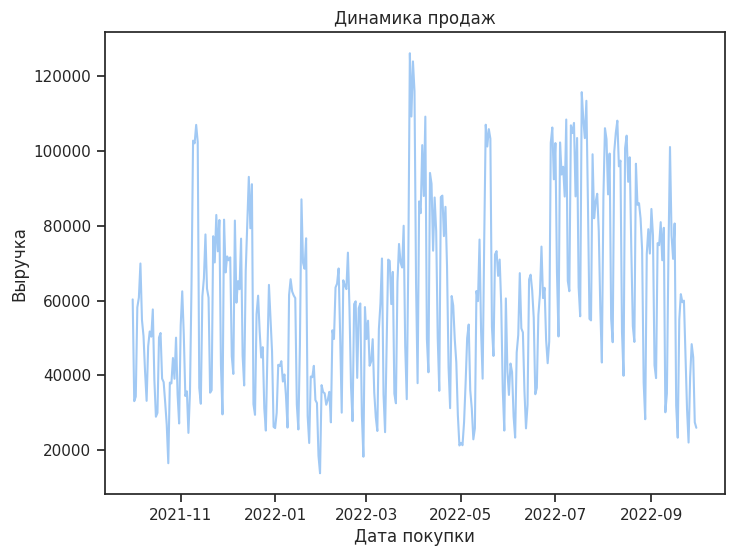

In [345]:
#построим график по полученным данным для визуализации
sns.lineplot(data=data, x='Issue_date', y='Revenue_amount', errorbar=None, estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.show()

Вывод:

Выручка на билеты авиакомпании в течение года была нестабильной, что можно увидеть по колебаниям на графике.

In [346]:
#рассмотрим выручку по датам покупки в зависимости от наличия/отсутствия программы лояльности
groups_ffp = data.pivot_table(values='Revenue_amount', index='Issue_date', columns='FFP_flag', aggfunc='sum')
groups_ffp

FFP_flag,FFP,No FFP
Issue_date,,
2021-10-01,22150,38160
2021-10-02,12080,21020
2021-10-03,15570,18750
2021-10-04,24860,33330
2021-10-05,27550,33250
...,...,...
2022-09-26,9500,30020
2022-09-27,10700,37650
2022-09-28,16710,28150


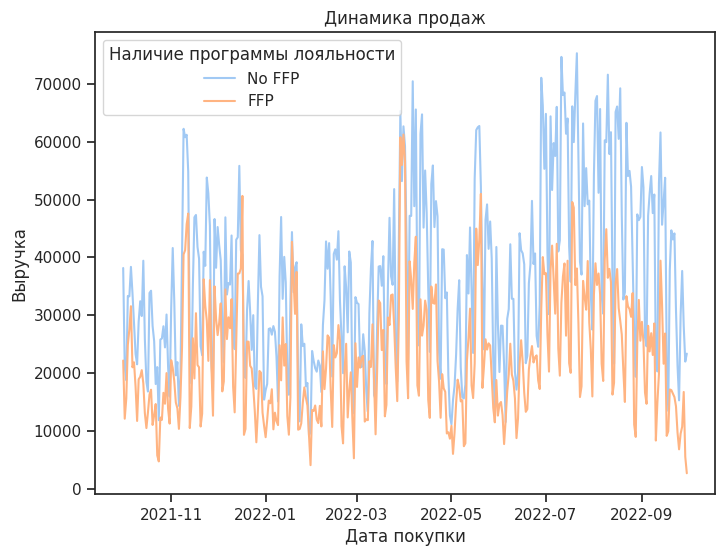

In [347]:
#визуализируем полученные данные
sns.lineplot(data=data, x='Issue_date', y='Revenue_amount', errorbar=None, hue='FFP_flag', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Наличие программы лояльности')
plt.show()

In [348]:
#сгруппируем датасет по выручке и наличию/отсутствию программы лояльности
groups_ffp_2 = data.groupby('FFP_flag')['Revenue_amount'].sum().reset_index()
groups_ffp_2

,FFP_flag,Revenue_amount
0,FFP,8222390
1,No FFP,13379980


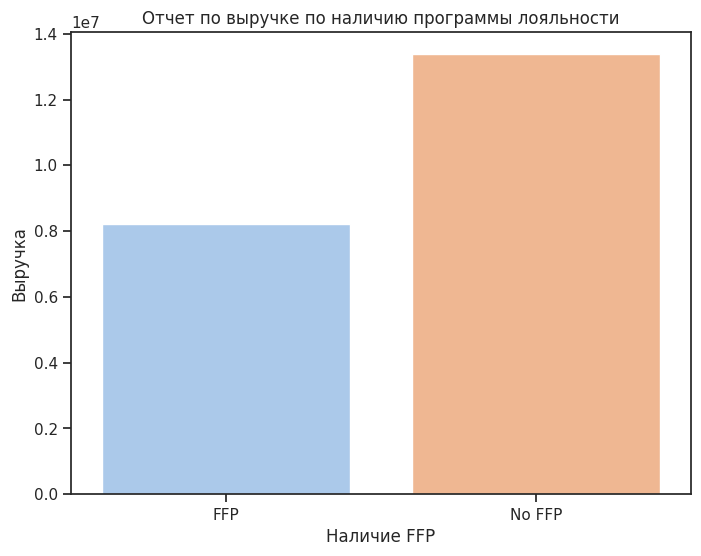

In [349]:
#построим столбатую диаграмму по сумме выручки в зависимости от наличия программы лояльности
sns.barplot(groups_ffp_2, x='FFP_flag', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по наличию программы лояльности', xlabel='Наличие FFP', ylabel='Выручка')
plt.show()

Вывод:

Большее количество выручки за год принесли клиенты без программы лояльности. Как и общий график динамики продаж, динамика выручки в зависимости от наличия/отсутствия программы лояльности имеет сильные колебания.

In [350]:
#посмотрим динамику выручки в засимости от типа перелета
groups_fl_type = data.pivot_table(values='Revenue_amount', index='Issue_date', columns='Route_flight_type', aggfunc='sum')
groups_fl_type

Route_flight_type,ВВЛ,МВЛ
Issue_date,,
2021-10-01,45710.0,14600.0
2021-10-02,26730.0,6370.0
2021-10-03,25940.0,8380.0
2021-10-04,48310.0,9880.0
2021-10-05,47580.0,13220.0
...,...,...
2022-09-26,36200.0,3320.0
2022-09-27,41900.0,6450.0
2022-09-28,31430.0,13430.0


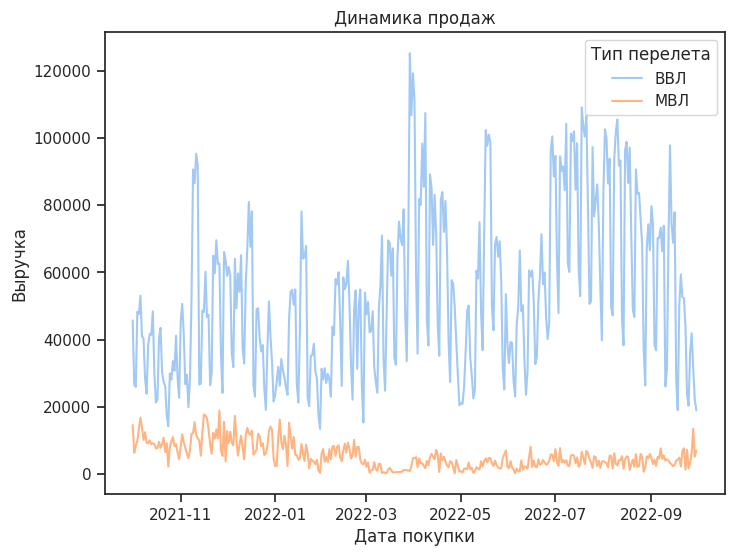

In [351]:
#проиллюстрируем полученный результат
sns.lineplot(data=data, x='Issue_date', y='Revenue_amount', errorbar=None, hue='Route_flight_type', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Тип перелета')
plt.show()

In [352]:
#сгруппируем данные по объему выручки по типам перелета
groups_fl_type_2 = data.groupby('Route_flight_type')['Revenue_amount'].sum().reset_index()
groups_fl_type_2

,Route_flight_type,Revenue_amount
0,ВВЛ,19610480
1,МВЛ,1991890


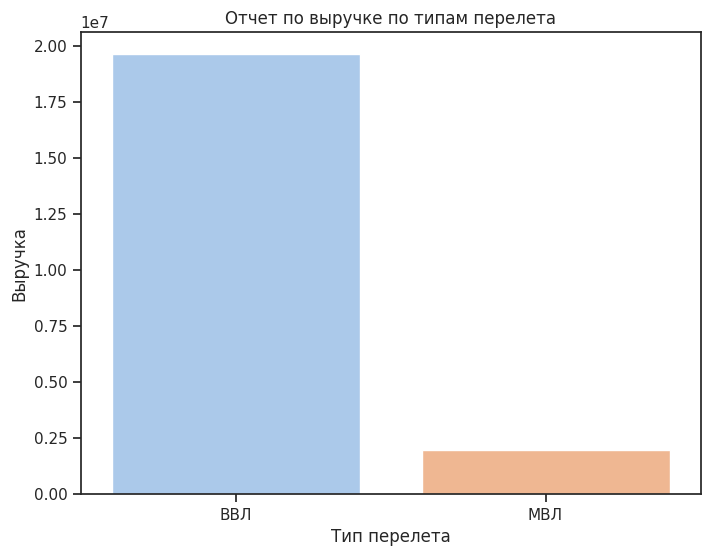

In [353]:
#построим столбчатую диаграмму по объему выручки в зависимости от типа перелета
sns.barplot(groups_fl_type_2, x='Route_flight_type', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по типам перелета', xlabel='Тип перелета', ylabel='Выручка')
plt.show()

Вывод:

Основная выручка компании получена за счет продажи билетов на внутренние воздушные линии. Выручка от ВВЛ превышает выручку от МВЛ практически в 10 раз.

In [354]:
#посмотрим динамику выручки в засимости от способа покупки
groups_sale_type = data.pivot_table(values='Revenue_amount', index='Issue_date', columns='Sale_type', aggfunc='sum')
groups_sale_type

Sale_type,OFFLINE,ONLINE
Issue_date,,
2021-10-01,31530,28780
2021-10-02,16180,16920
2021-10-03,8270,26050
2021-10-04,26390,31800
2021-10-05,26910,33890
...,...,...
2022-09-26,22290,17230
2022-09-27,27080,21270
2022-09-28,25930,18930


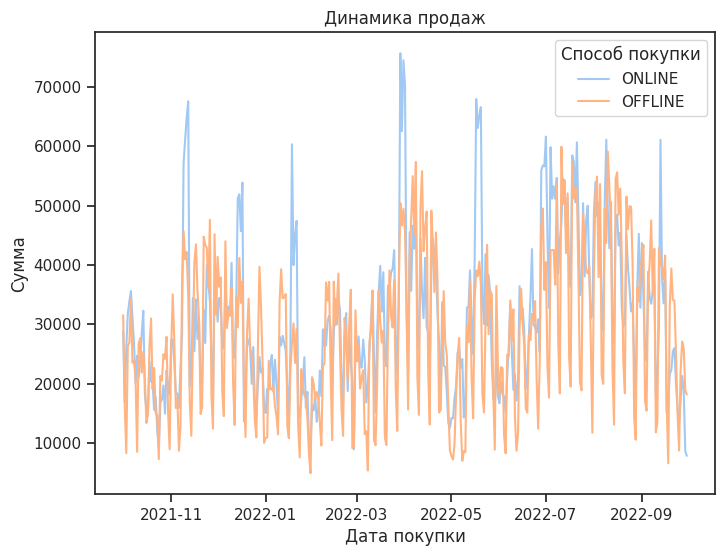

In [355]:
#построим линейный график выручки по способу покупки
sns.lineplot(data=data, x='Issue_date', y='Revenue_amount', errorbar=None, hue='Sale_type', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Сумма')
plt.legend(title='Способ покупки')
plt.show()

In [356]:
#сгруппируем объем выручки в зависимости от способа покупки
groups_sale_type_2 = data.groupby('Sale_type')['Revenue_amount'].sum().reset_index()
groups_sale_type_2

,Sale_type,Revenue_amount
0,OFFLINE,10316900
1,ONLINE,11285470


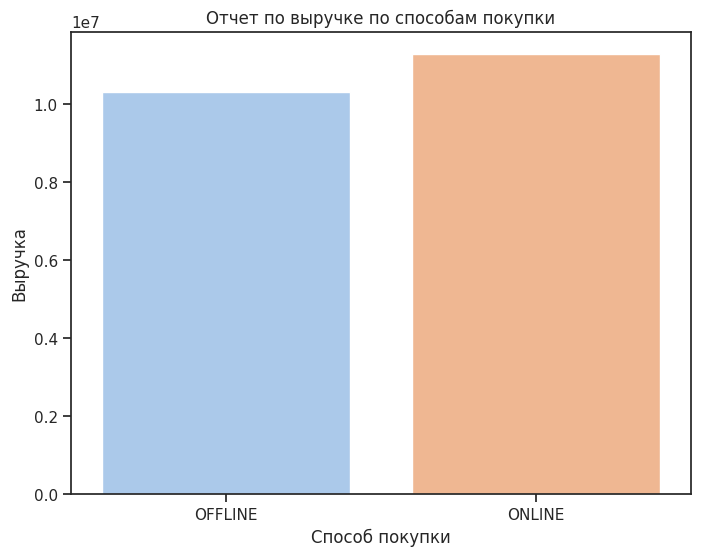

In [357]:
#построим столбчатую диаграмму выручки по способам покупки
sns.barplot(groups_sale_type_2, x='Sale_type', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по способам покупки', xlabel='Способ покупки', ylabel='Выручка')
plt.show()

Вывод:

Выручка билетов авиакомпании от онлайн-покупок примерно равна покупкам офлайн. Динамика продаж в зависимости от способа покупки билетов имеет нестабильный характер.

In [358]:
#сгруппируем данные о выручке по типам пассажиров
groups_pax_type = data.groupby('Pax_type')['Revenue_amount'].sum().reset_index()
groups_pax_type

,Pax_type,Revenue_amount
0,AD,20259210
1,CHD,1333430
2,INF,9730


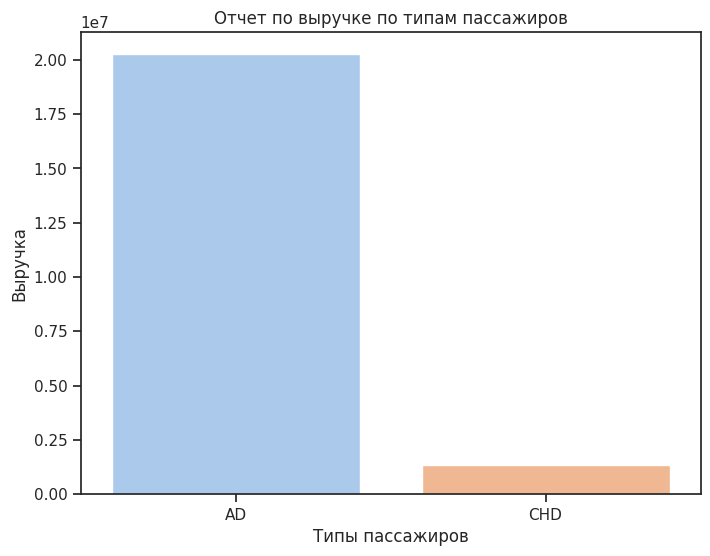

In [359]:
#построим столбчатую диаграмму выручки в зависимости от типов пассажиров
#пассажиры, тип которых не определен, составляет менее 1%, поэтому на диаграмме не имеет смысла отображать данную категорию
groups_pax_type_2 = groups_pax_type.drop(2)
sns.barplot(groups_pax_type_2, x='Pax_type', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по типам пассажиров', xlabel='Типы пассажиров', ylabel='Выручка')
plt.show()

Вывод:

Выручка, полученная от продажи билетов для детей, составляет примерно 6% от общего объема выручки. Выручка от билетов для взрослых составила 20'259'210, что составляет около 94% объема выручки.

### **3.2**

<Axes: >

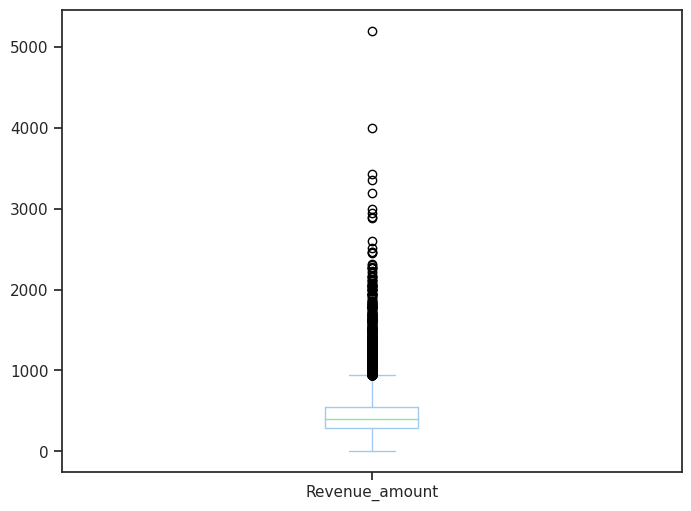

In [360]:
#построим "ящик с усами" для наших данных выручки
data['Revenue_amount'].plot(kind='box')

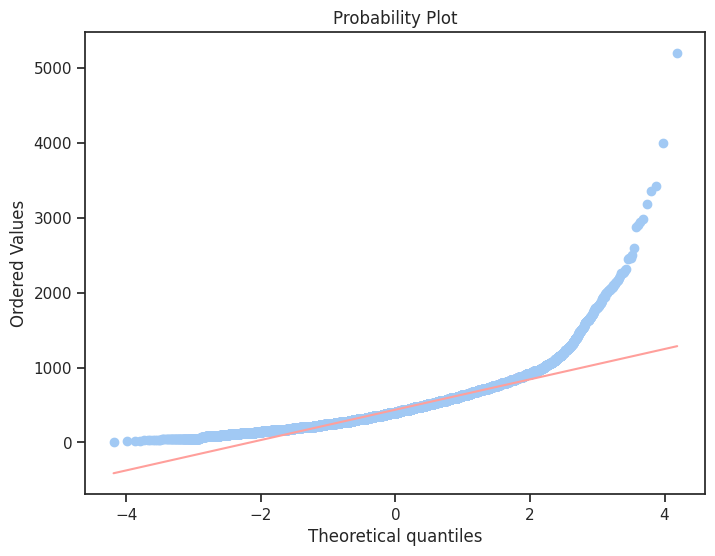

In [361]:
#сравним данные с нормальным распределением
st.probplot(data['Revenue_amount'], dist='norm', plot=plt)
plt.show()

In [362]:
#посчитаем количество выбросов
q75 = np.percentile(data['Revenue_amount'], 75)
q25 = np.percentile(data['Revenue_amount'], 25)
iqr = q75 - q25
ejection_h = q75 + iqr*1.5
n_ejection = data['Revenue_amount'][data['Revenue_amount'] > ejection_h].count()
print(f'Число выбросов равно {n_ejection}. Это {(n_ejection*100/data.shape[0]).round()}% от общего числа наблюдений.')

Число выбросов равно 987. Это 2.0% от общего числа наблюдений.


In [363]:
#просмотрим статистические показатели по выручке для наших данных
data.describe()

,Revenue_amount
count,49362.000000
mean,437.631579
std,214.611412
min,10.000000
25%,290.000000
50%,400.000000
75%,550.000000
max,5200.000000


Вывод:

2% от общего количества показателей выручки является выбросами (987 значений). Распределение не является нормальным. Число строк на данном этапе - 49'362. Среднее значение выручки - 437,63.

In [364]:
#удалим выбросы
data = data[data['Revenue_amount'] <= ejection_h].reset_index(drop=True)
data

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No FFP,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No FFP,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No FFP,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No FFP,ONLINE
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No FFP,OFFLINE
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No FFP,OFFLINE


<Axes: >

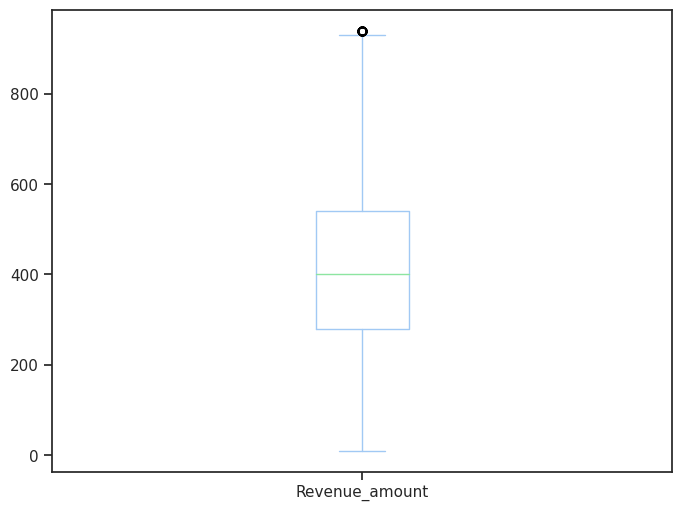

In [365]:
#просмотрим "ящик с усами" по новым данным без выбросов
data['Revenue_amount'].plot(kind='box')

In [366]:
#проверим показатели описательной статистики
data.describe()

,Revenue_amount
count,48375.000000
mean,421.941085
std,178.547873
min,10.000000
25%,280.000000
50%,400.000000
75%,540.000000
max,940.000000


Вывод:

Мы удалили 987 выбросов из нашего датасета. Просматривая статистические показатели выручки можно отметить, что уменьшилось стандартное отклонение, максимальное значение выручки снизилось до 940, среднее значение изменилось несильно.

### **3.3**

In [367]:
#распределим месяца по временам года
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))
month_to_season

{1: 'Winter',
 2: 'Winter',
 3: 'Spring',
 4: 'Spring',
 5: 'Spring',
 6: 'Summer',
 7: 'Summer',
 8: 'Summer',
 9: 'Autumn',
 10: 'Autumn',
 11: 'Autumn',
 12: 'Winter'}

In [368]:
#добавим столбец с сезоном, в котором был куплен билет
data['Season'] = data['Issue_date'].dt.month.map(month_to_season)
data

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No FFP,ONLINE,Winter
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No FFP,OFFLINE,Winter
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No FFP,ONLINE,Winter
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter
...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No FFP,ONLINE,Summer
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No FFP,OFFLINE,Summer
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No FFP,OFFLINE,Summer


In [369]:
#сгруппируем объем выручки по временам года
groups_seasons = data.groupby('Season')['Revenue_amount'].sum().reset_index()
groups_seasons

,Season,Revenue_amount
0,Autumn,4590790
1,Spring,5345840
2,Summer,6207480
3,Winter,4267290


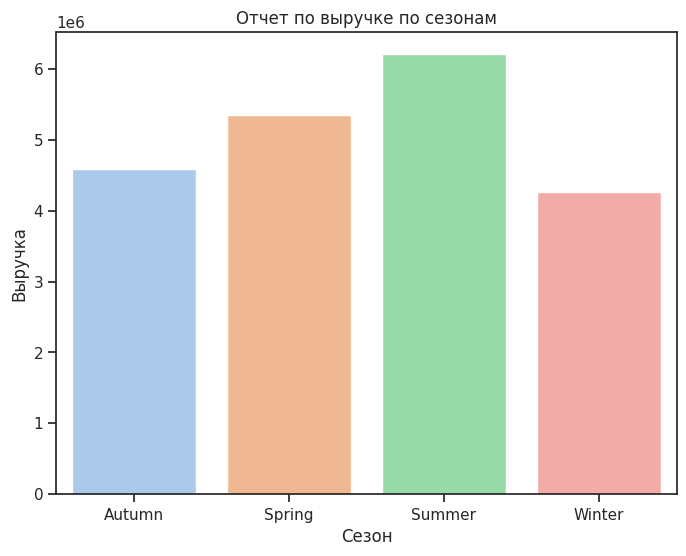

In [370]:
#построим столбчатую диаграмму, отражающую выручку по сезонам
sns.barplot(groups_seasons, x='Season', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по сезонам', xlabel='Сезон', ylabel='Выручка')
plt.show()

Вывод:

Сезоны можно расположить в порядке убывания выручки: лето, весна, осень, зима.

H0: выручка от продаж зимой и осенью не отличается.
H1: выручка от продаж зимой и осенью отличается.

In [371]:
#сгруппируем показатели выручки, которую компания получила осенью, по месяцам
s_autumn = data[data['Season'] == 'Autumn']
s_autumn_grouped = s_autumn.groupby(s_autumn['Issue_date'].dt.month)['Revenue_amount'].sum().reset_index()
s_autumn_grouped

,Issue_date,Revenue_amount
0,9,1542980
1,10,1280870
2,11,1766940


In [372]:
#сгруппируем показатели выручки, которую компания получила зимой, по месяцам
s_winter = data[data['Season'] == 'Winter']
s_winter_grouped = s_winter.groupby(s_winter['Issue_date'].dt.month)['Revenue_amount'].sum().reset_index()
s_winter_grouped

,Issue_date,Revenue_amount
0,1,1304090
1,2,1297190
2,12,1666010


[Text(0.5, 1.0, 'Функция плотности выручки осенью'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

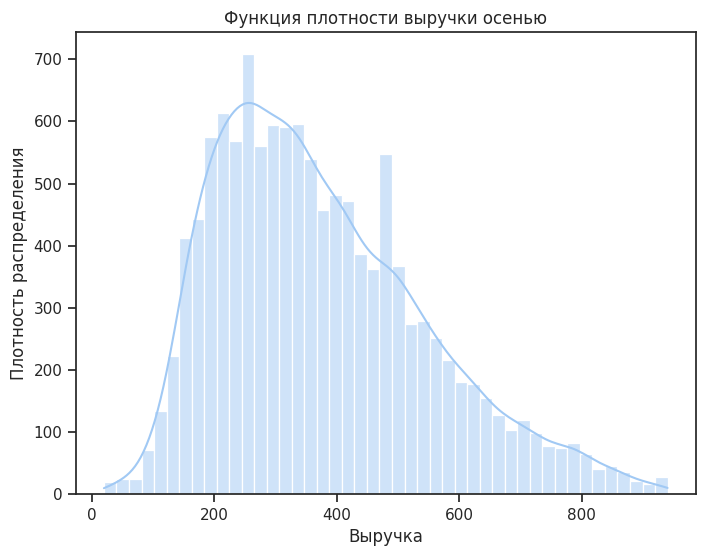

In [373]:
#построим функцию плотности распределения отдельно для осени
sns.histplot(data[data['Season'] == 'Autumn']['Revenue_amount'], kde=True).set(title='Функция плотности выручки осенью', xlabel='Выручка', ylabel='Плотность распределения')

[Text(0.5, 1.0, 'Функция плотности выручки зимой'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

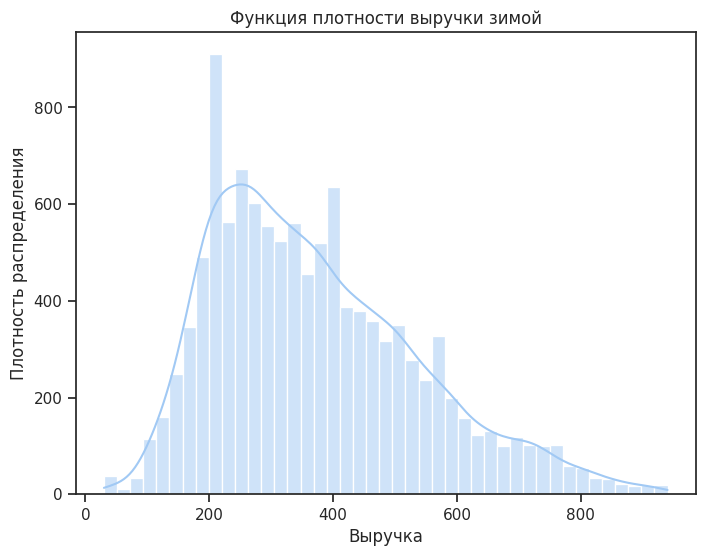

In [374]:
#построим также функцию плотности распределения для значений выручки за зиму
sns.histplot(data[data['Season'] == 'Winter']['Revenue_amount'], kde=True).set(title='Функция плотности выручки зимой', xlabel='Выручка', ylabel='Плотность распределения')

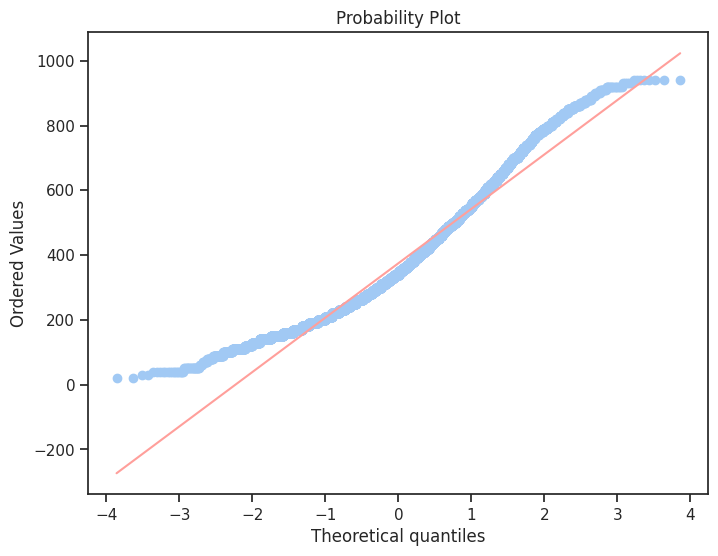

In [375]:
#построим Q-Q plot для значения выручки за осень и сравним с нормальным распределением
st.probplot(data[data['Season'] == 'Autumn']['Revenue_amount'], dist='norm', plot=plt)
plt.show()

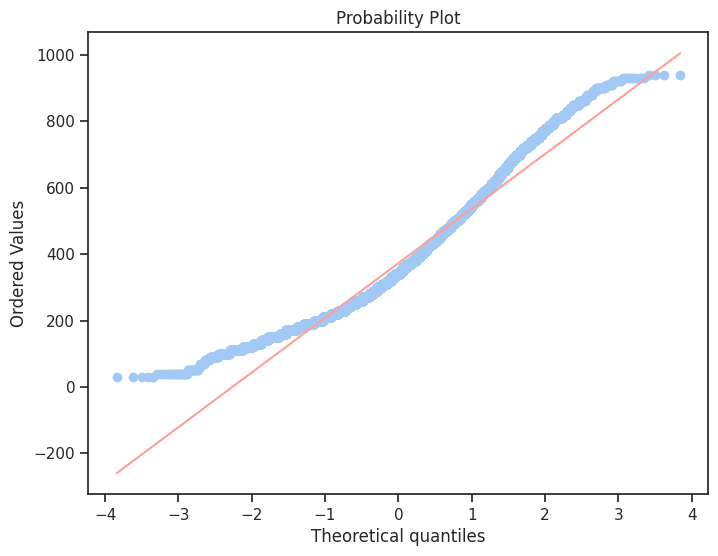

In [376]:
#построим Q-Q plot для значения выручки за зиму и сравним с нормальным распределением
st.probplot(data[data['Season'] == 'Winter']['Revenue_amount'], dist='norm', plot=plt)
plt.show()

Вывод: смотря на графики плотности распредления и QQ-plot выручки зимой и осенью, можно сказать, что распределения не является нормальным. На QQ-plot по обеим выборкам можно заметить отклонение от нормального распределения.

In [377]:
#проверим нашу гипотезу о равенстве выручки зимой и осенью
alpha = 0.05
results = st.mannwhitneyu(data[data['Season'] == 'Autumn']['Revenue_amount'], data[data['Season'] == 'Winter']['Revenue_amount'])

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.4549933504837227
Нет оснований отклонить нулевую гипотезу


Вывод: Так как у нас нет оснований отклонить H0, выручка от продаж зимой и осенью не отличается.

In [378]:
#сгруппируем объем выручки и количество продаж по месяцам
data['Month'] = data['Issue_date'].dt.month
group_revenue = data.pivot_table(index={'Month', 'Season'}, values='Revenue_amount', aggfunc={'sum', 'count'}).reset_index()
group_revenue

,Season,Month,count,sum
0,Autumn,9,3555,1542980
1,Autumn,10,3579,1280870
2,Autumn,11,5109,1766940
3,Spring,3,4275,1759960
4,Spring,4,3887,1934200
5,Spring,5,3563,1651680
6,Summer,6,3287,1538600
7,Summer,7,5093,2447960
8,Summer,8,4571,2220920
9,Winter,1,3552,1304090


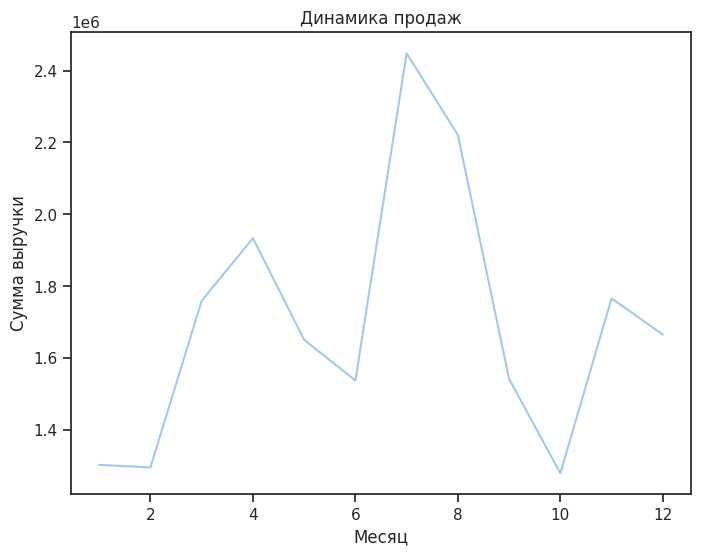

In [379]:
#визуализируем полученные данные по выручке с помощью линейного графика
sns.lineplot(data=group_revenue, x='Month', y='sum').set(title='Динамика продаж', xlabel='Месяц', ylabel='Сумма выручки')
plt.show()

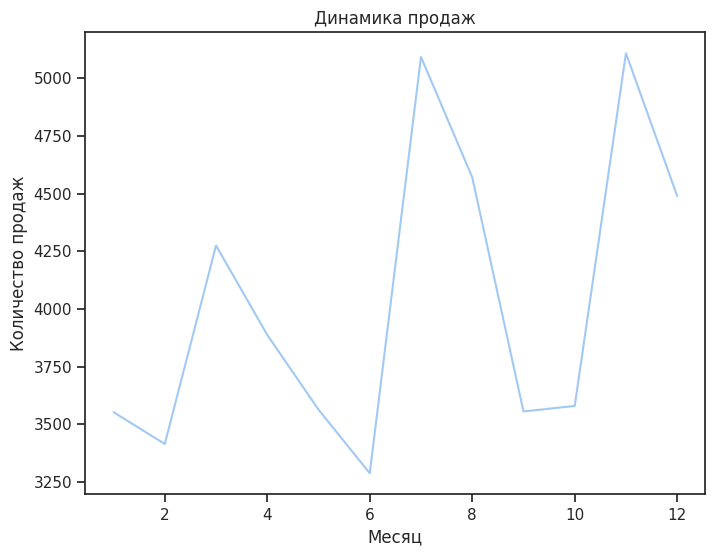

In [380]:
#визуализируем полученные данные по количеству с помощью линейного графика
sns.lineplot(data=group_revenue, x='Month', y='count').set(title='Динамика продаж', xlabel='Месяц', ylabel='Количество продаж')
plt.show()

Вывод:

Наибольший объем выручки авиакомпании наблюдается в июле, наименьший - в январе, феврале и в октябре.

In [381]:
#проверим корреляцию
group_revenue.corr()

<ipython-input-381-098be8a65771>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  group_revenue.corr()


,Month,count,sum
Month,1.000000,0.461072,0.192032
count,0.461072,1.000000,0.753134
sum,0.192032,0.753134,1.000000


Вывод:

Имея коэффициент корреляции 0,75, мы можем заключить, что между суммой выручки и количеством продаж существует сильная прямая связь. Остальные показатели не демонстрируют показательных взаимозависимостей.

### **3.4**

In [382]:
#добавим новый столбец с количеством дней между датой покупки билета и датой перелета
data['Day_space'] = (data['Flight_date_loc']-data['Issue_date']).dt.days
data[['Issue_date', 'Flight_date_loc', 'Day_space']]

,Issue_date,Flight_date_loc,Day_space
0,2021-12-07,2022-01-11,35
1,2021-12-31,2022-01-03,3
2,2021-11-28,2022-01-04,37
3,2021-12-08,2022-01-05,28
4,2021-12-08,2022-01-12,35
...,...,...,...
48370,2022-06-11,2022-06-22,11
48371,2022-06-06,2022-06-20,14
48372,2022-06-26,2022-06-29,3
48373,2022-06-26,2022-06-28,2


In [383]:
#сгруппируем данные по выручке в зависимости от времени между датой покупки билета и датой перелета
data.groupby('Day_space')['Revenue_amount'].sum().reset_index()

,Day_space,Revenue_amount
0,0,493650
1,1,1555710
2,2,1518520
3,3,1359740
4,4,1187120
...,...,...
268,300,360
269,304,400
270,307,520
271,308,430


Группы:
*   В последний момент (от 0 до 3 дней)
*   Поздно (от 4 до 10 дней)
*   Заранее (от 11 дней и больше)





In [384]:
#добавим новый столбец, в котором укажем группу приобретения билета
data.loc[(0<=data['Day_space']) & (data['Day_space']<=3), 'Purchase'] = 'Last moment'
data.loc[(3<data['Day_space']) & (data['Day_space']<=10), 'Purchase'] = 'Late'
data.loc[(10<data['Day_space']), 'Purchase'] = 'In advance'
data

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Day_space,Purchase
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No FFP,ONLINE,Winter,12,35,In advance
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No FFP,OFFLINE,Winter,12,3,Last moment
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11,37,In advance
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No FFP,ONLINE,Winter,12,28,In advance
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12,35,In advance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No FFP,ONLINE,Summer,6,11,In advance
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No FFP,OFFLINE,Summer,6,14,In advance
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6,3,Last moment
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No FFP,OFFLINE,Summer,6,2,Last moment


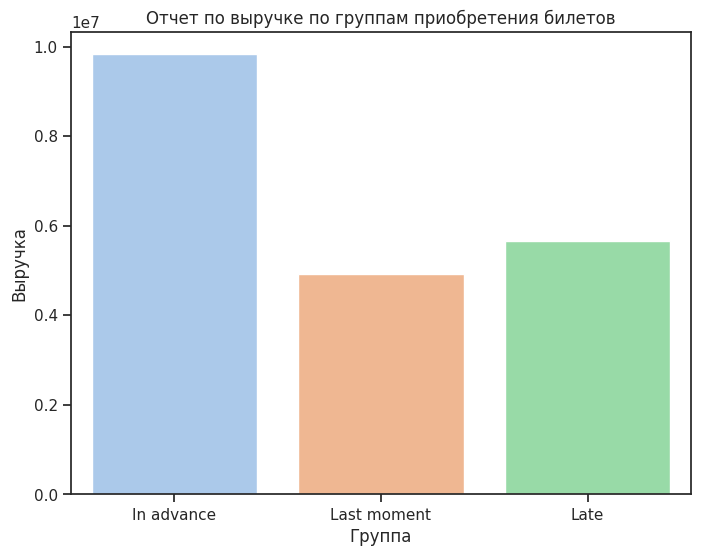

In [385]:
#построим столбчатую диаграмму, отражающую выручку по группам приобретения билетов
sns.barplot(data, x='Purchase', y='Revenue_amount', errorbar=None, estimator=np.sum).set(title='Отчет по выручке по группам приобретения билетов', xlabel='Группа', ylabel='Выручка')
plt.show()

[Text(0.5, 1.0, 'Функция плотности выручки группы людей, покупающих билеты заранее'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

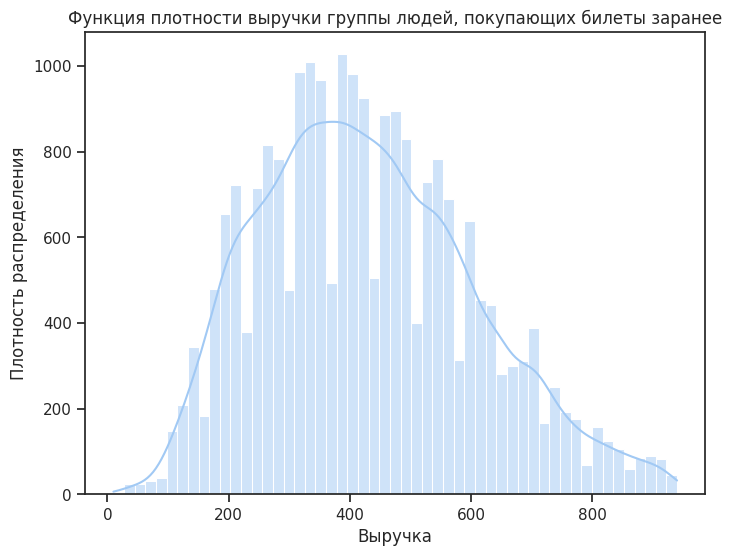

In [386]:
#построим также функцию плотности распределения для значений выручки группы людей, покупающих билеты заранее
sns.histplot(data[data['Purchase'] == 'In advance']['Revenue_amount'], kde=True).set(title='Функция плотности выручки группы людей, покупающих билеты заранее', xlabel='Выручка', ylabel='Плотность распределения')

[Text(0.5, 1.0, 'Функция плотности выручки группы людей, покупающих билеты в последний момент'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

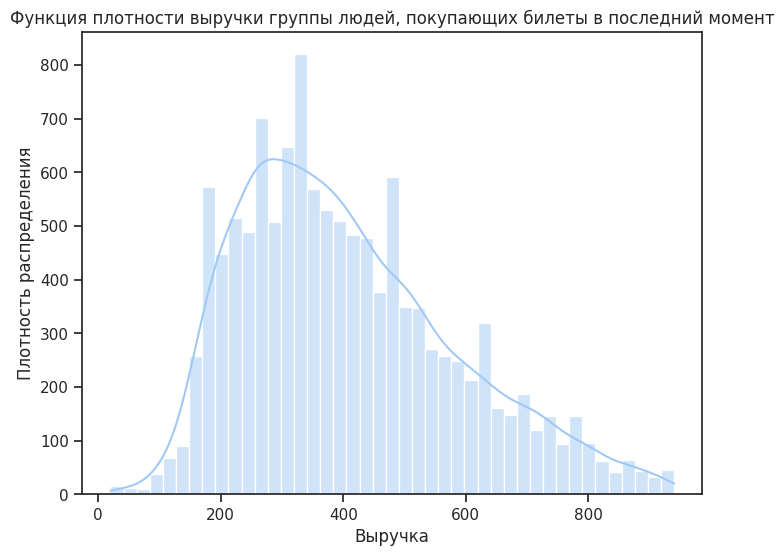

In [387]:
#построим также функцию плотности распределения для значений выручки группы людей, покупающих билеты в последний момент
sns.histplot(data[data['Purchase'] == 'Last moment']['Revenue_amount'], kde=True).set(title='Функция плотности выручки группы людей, покупающих билеты в последний момент', xlabel='Выручка', ylabel='Плотность распределения')

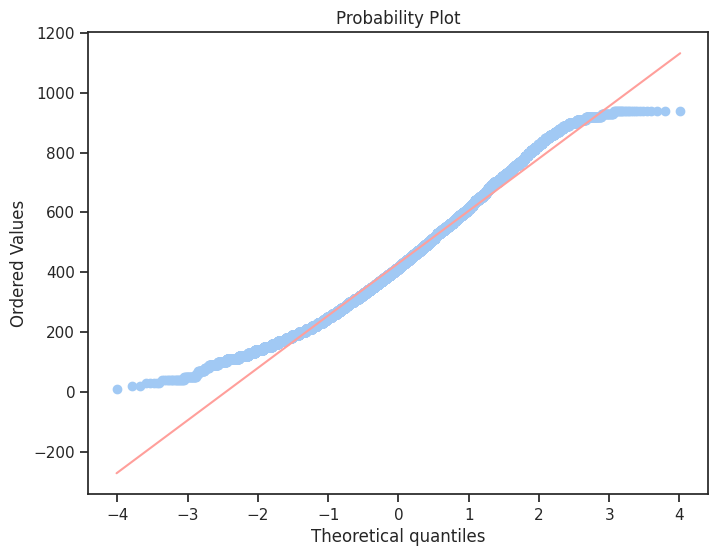

In [388]:
#построим Q-Q plot для значения выручки группы людей, покупающих билеты заранее, и сравним с нормальным распределением
st.probplot(data[data['Purchase'] == 'In advance']['Revenue_amount'], dist='norm', plot=plt)
plt.show()

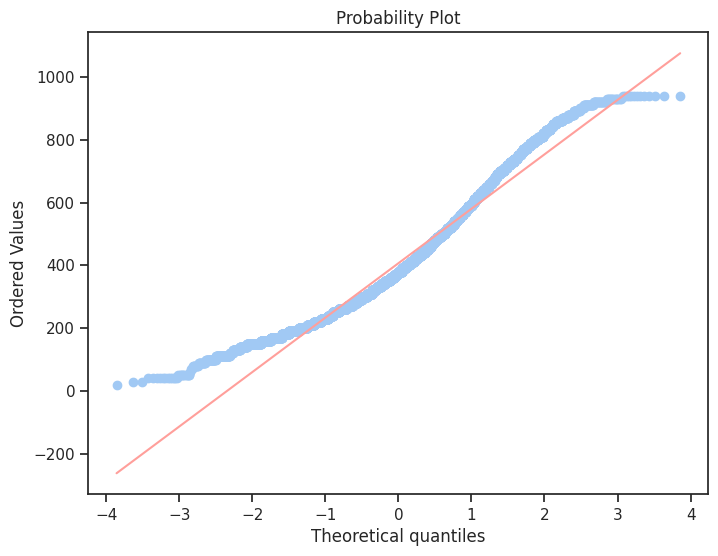

In [389]:
#построим Q-Q plot для значения выручки группы людей, покупающих билеты в последний момент, и сравним с нормальным распределением
st.probplot(data[data['Purchase'] == 'Last moment']['Revenue_amount'], dist='norm', plot=plt)
plt.show()

Вывод: смотря на графики, можно сказать, что распределение не является нормальным. QQ-plot группы людей, покупающих билеты заранее, и группы людей, приобретающих билеты в последний момент, показывают отклонение от нормального распределения.

H0: выручка от продаж для группы "в последний момент" и "заранее" не отличается.
H1: выручка от продаж для группы "в последний момент" и "заранее" отличается.

In [390]:
#проверим гипотезу
alpha = 0.05
results = st.mannwhitneyu(data[data['Purchase'] == 'In advance']['Revenue_amount'], data[data['Purchase'] == 'Last moment']['Revenue_amount'])

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 1.3431557509916607e-43
Отклоняем нулевую гипотезу


Вывод:

Выручка для групп людей, которые покупают билеты в последний момент и которые покупают билеты заранее, отличается  с вероятностью 0,95.

### **3.5**

In [391]:
#добавим датасет, в котором отражен код аэропорта, город и страна, в котором они находятся
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=column_names)
df

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [392]:
#в нашем датасете (data) код московских аэропортов указан как MOW
#для проверки рассмотрим, какие коды применяются для них в данном датасете (df)
df[df['Location'] == 'Moscow']

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2985,Sheremetyevo International Airport,Moscow,Russia,SVO,UUEE,55.972599,37.414600,622,3,N,Europe/Moscow,airport,OurAirports
2988,Vnukovo International Airport,Moscow,Russia,VKO,UUWW,55.591499,37.261501,685,3,N,Europe/Moscow,airport,OurAirports
4029,Domodedovo International Airport,Moscow,Russia,DME,UUDD,55.408798,37.906300,588,3,N,Europe/Moscow,airport,OurAirports
4360,Bykovo Airport,Moscow,Russia,BKA,UUBB,55.617199,38.060001,427,3,N,Europe/Moscow,airport,OurAirports
8661,Ostafyevo International Airport,Moscow,Russia,OSF,UUMO,55.511667,37.507222,568,3,N,Europe/Moscow,airport,OurAirports
11986,Myachkovo Airport,Moscow,Russia,\N,UUBM,55.560001,37.985001,410,\N,\N,\N,airport,OurAirports


In [393]:
#заменим коды московских аэропортов на MOW
mapping = {'SVO': 'MOW', 'DME': 'MOw', 'VKO': 'MOW'}
df['IATA_Code'] = df['IATA_Code'].replace(mapping)

In [394]:
#создадим новый столбец, который будет иметь направление полета, включающее аэропорт отправления и аэропорт назначения
#на его основе просуммируем объем выручки по напралениям полета
data['Duration'] = data['Orig_city_code'] + ' ' + data['Dest_city_code']
group_duration = data.groupby('Duration')['Revenue_amount'].sum().reset_index()
data

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Day_space,Purchase,Duration
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No FFP,ONLINE,Winter,12,35,In advance,MOW KGD
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No FFP,OFFLINE,Winter,12,3,Last moment,UUS OVB
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11,37,In advance,KGD MOW
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No FFP,ONLINE,Winter,12,28,In advance,VOZ MOW
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12,35,In advance,MOW KRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No FFP,ONLINE,Summer,6,11,In advance,MOW OMS
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No FFP,OFFLINE,Summer,6,14,In advance,LED MOW
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6,3,Last moment,MOW KZN
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No FFP,OFFLINE,Summer,6,2,Last moment,KZN MOW


In [395]:
#создадим новый датасет только для внутренних рейсов
data_vvl = data[data['Route_flight_type'] == 'ВВЛ']

In [396]:
#выделим только аэропорт отправления, аэропорт назначения и направление полета
data_vvl = data_vvl[['Orig_city_code', 'Dest_city_code', 'Duration']]

In [397]:
#сначала выделим топ-10 направлений полетов
data_vvl_top = data_vvl.groupby(data_vvl.columns.tolist(), as_index=False).size().sort_values('size', ascending=False).head(10)

#добавим в наш датасет информацию о выручке по данным направлениям
data_vvl_top_10 = pd.merge(data_vvl_top,
 group_duration,
 on ='Duration',
 how ='left')

#посмотрим результат
data_vvl_top_10

,Orig_city_code,Dest_city_code,Duration,size,Revenue_amount
0,AER,MOW,AER MOW,1326,513970
1,MOW,AER,MOW AER,1292,480480
2,LED,MOW,LED MOW,1211,280870
3,MOW,LED,MOW LED,1190,273720
4,OVB,MOW,OVB MOW,967,460720
5,MOW,OVB,MOW OVB,944,440440
6,KZN,MOW,KZN MOW,759,205230
7,MOW,KZN,MOW KZN,757,204660
8,MOW,UFA,MOW UFA,708,210610
9,OVB,AER,OVB AER,668,382470


In [398]:
#выделим из датасета df только города, страны и коды аэропортов
df = df[['Location', 'Country', 'IATA_Code']]

#переименуем столбцы для дальнейшего слияния по столбцам
df.columns = ['Orig_location', 'Orig_country', 'Orig_city_code']

#добавим информацию о городе и стране отправления
data_vvl_top_10 = pd.merge(data_vvl_top_10,
 df,
 on ='Orig_city_code',
 how ='left')

#снова переименуем столбцы df
df.columns = ['Dest_location', 'Dest_country', 'Dest_city_code']

#добавим информацию о городе и стране назначения
data_vvl_top_10 = pd.merge(data_vvl_top_10,
  df,
  on ='Dest_city_code',
  how ='left')

#выделим только нужную информацию
top_10_vvl = data_vvl_top_10[['Orig_location','Orig_country','Dest_location','Dest_country', 'Revenue_amount']].drop_duplicates().reset_index(drop=True)
top_10_vvl

,Orig_location,Orig_country,Dest_location,Dest_country,Revenue_amount
0,Sochi,Russia,Moscow,Russia,513970
1,Moscow,Russia,Sochi,Russia,480480
2,St. Petersburg,Russia,Moscow,Russia,280870
3,Moscow,Russia,St. Petersburg,Russia,273720
4,Novosibirsk,Russia,Moscow,Russia,460720
5,Moscow,Russia,Novosibirsk,Russia,440440
6,Kazan,Russia,Moscow,Russia,205230
7,Moscow,Russia,Kazan,Russia,204660
8,Moscow,Russia,Ufa,Russia,210610
9,Novosibirsk,Russia,Sochi,Russia,382470


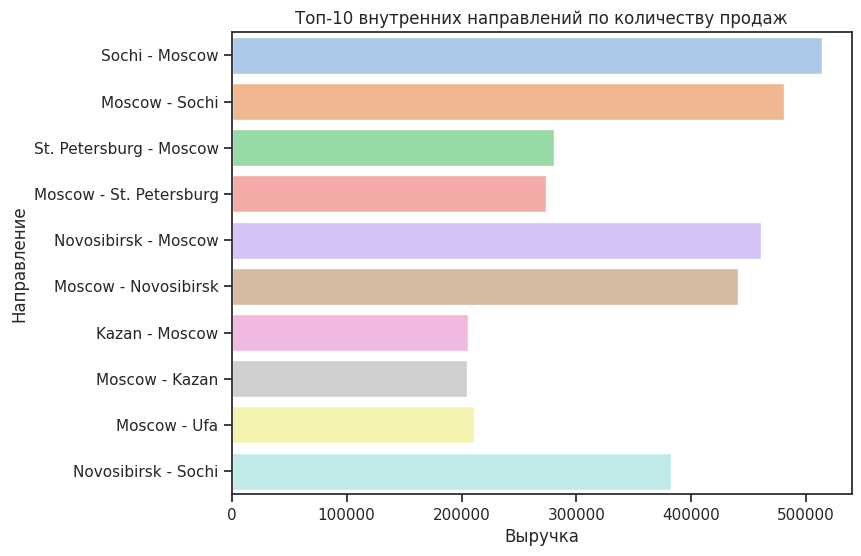

In [399]:
#проиллюстрируем топ-10 внутренних направлений по количеству продаж
top_10_vvl['Duration'] = top_10_vvl['Orig_location'] + ' - ' + top_10_vvl['Dest_location']
sns.barplot(top_10_vvl, y='Duration', x='Revenue_amount', errorbar=None).set(title='Топ-10 внутренних направлений по количеству продаж', xlabel='Выручка', ylabel='Направление')
plt.show()

Вывод:

Как мы можем видеть из диаграммы, наиболее популярные направления связаны с Москвой. Расположение направлений по убыванию в зависимости от количества продаж не совпадает с расположением направлений в зависимости от объема выручки по этим же направлениям.

In [400]:
#создадим новый датасет для международных направлений
data_mvl = data[data['Route_flight_type'] == 'МВЛ']

In [401]:
#выделим только аэропорт отправления, аэропорт назначения и направление полета
data_mvl = data_mvl[['Orig_city_code', 'Dest_city_code', 'Duration']]

In [402]:
#сначала выделим топ-10 направлений полетов
data_mvl_top = data_mvl.groupby(data_mvl.columns.tolist(), as_index=False).size().sort_values('size', ascending=False).head(10)

#добавим в наш датасет информацию о выручке по данным направлениям
data_mvl_top_10 = pd.merge(data_mvl_top,
 group_duration,
 on ='Duration',
 how ='left')

#посмотрим результат
data_mvl_top_10

,Orig_city_code,Dest_city_code,Duration,size,Revenue_amount
0,MOW,OSS,MOW OSS,151,68130
1,LBD,MOW,LBD MOW,144,95190
2,OSS,MOW,OSS MOW,136,80920
3,MOW,LBD,MOW LBD,129,57710
4,OVB,FRU,OVB FRU,120,46980
5,OVB,OSS,OVB OSS,119,47450
6,LBD,OVB,LBD OVB,116,57740
7,OSS,OVB,OSS OVB,115,56980
8,FRU,OVB,FRU OVB,102,48300
9,MOW,AYT,MOW AYT,101,38080


In [403]:
#добавим в датасет информацию о городе и стране назначения
data_mvl_top_10 = pd.merge(data_mvl_top_10,
 df,
 on ='Dest_city_code',
 how ='left')

#снова переименуем столбцы df
df.columns = ['Orig_location', 'Orig_country', 'Orig_city_code']

#добавим в датасет информацию о городе и стране отправления
data_mvl_top_10 = pd.merge(data_mvl_top_10,
 df,
 on ='Orig_city_code',
 how ='left')

#выделим только нужную информацию
top_10_mvl = data_mvl_top_10[['Orig_location','Orig_country','Dest_location','Dest_country', 'Revenue_amount']].drop_duplicates().reset_index(drop=True)
top_10_mvl

,Orig_location,Orig_country,Dest_location,Dest_country,Revenue_amount
0,Moscow,Russia,Osh,Kyrgyzstan,68130
1,Khudzhand,Tajikistan,Moscow,Russia,95190
2,Osh,Kyrgyzstan,Moscow,Russia,80920
3,Moscow,Russia,Khudzhand,Tajikistan,57710
4,Novosibirsk,Russia,Bishkek,Kyrgyzstan,46980
5,Novosibirsk,Russia,Osh,Kyrgyzstan,47450
6,Khudzhand,Tajikistan,Novosibirsk,Russia,57740
7,Osh,Kyrgyzstan,Novosibirsk,Russia,56980
8,Bishkek,Kyrgyzstan,Novosibirsk,Russia,48300
9,Moscow,Russia,Antalya,Turkey,38080


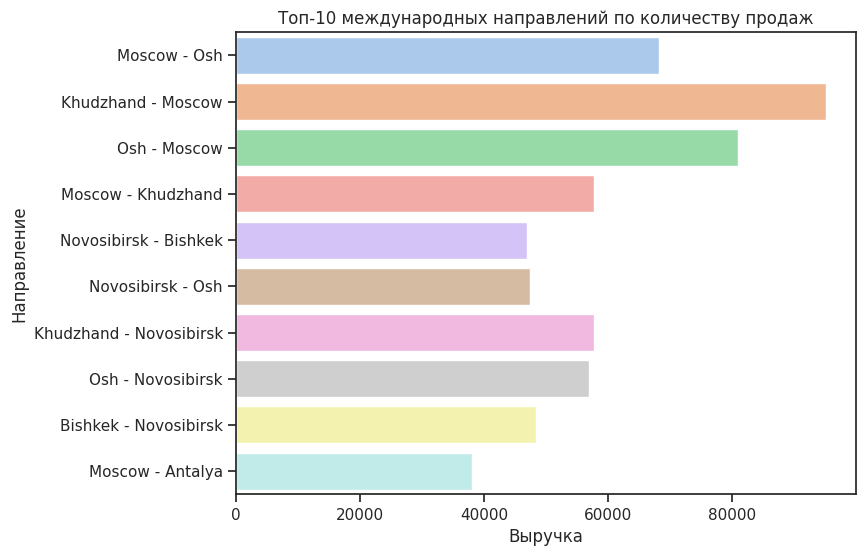

In [404]:
#проиллюстрируем топ-10 международных направлений по количеству продаж
top_10_mvl['Duration'] = top_10_mvl['Orig_location'] + ' - ' + top_10_mvl['Dest_location']
sns.barplot(top_10_mvl, y='Duration', x='Revenue_amount', errorbar=None).set(title='Топ-10 международных направлений по количеству продаж', xlabel='Выручка', ylabel='Направление')
plt.show()

Вывод:

Наболее популярные международные направления связаны с Москвой и Новосибирском. Также как и во внутренних рейсах расположение направлений по убыванию в зависимости от количества продаж не совпадает с расположением направлений в зависимости от объема выручки по этим же направлениям.

### **3.6**

In [405]:
#создадим для матрицы корреляций новый датасет
data_corr = data[['Revenue_amount', 'Route_flight_type', 'FFP_flag', 'Sale_type', 'Season']]
data_corr

,Revenue_amount,Route_flight_type,FFP_flag,Sale_type,Season
0,200,ВВЛ,No FFP,ONLINE,Winter
1,610,ВВЛ,No FFP,OFFLINE,Winter
2,390,ВВЛ,FFP,ONLINE,Autumn
3,190,ВВЛ,No FFP,ONLINE,Winter
4,190,ВВЛ,FFP,OFFLINE,Winter
...,...,...,...,...,...
48370,480,ВВЛ,No FFP,ONLINE,Summer
48371,270,ВВЛ,No FFP,OFFLINE,Summer
48372,230,ВВЛ,FFP,ONLINE,Summer
48373,270,ВВЛ,No FFP,OFFLINE,Summer


In [406]:
#изменим качественный признак на количественный
dict_route_flight_type = {'ВВЛ': 1, 'МВЛ': 0}
data_corr['Route_flight_type'] = data_corr['Route_flight_type'].map(dict_route_flight_type)

<ipython-input-406-cd254af9f787>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['Route_flight_type'] = data_corr['Route_flight_type'].map(dict_route_flight_type)


In [407]:
#изменим качественный признак на количественный
dict_sales_type = {'ONLINE': 1, 'OFFLINE': 0}
data_corr['Sales_type_group'] = data_corr['Sale_type'].map(dict_sales_type)

<ipython-input-407-1f405b163d59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['Sales_type_group'] = data_corr['Sale_type'].map(dict_sales_type)


In [408]:
#изменим качественный признак на количественный
dict_season = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
data_corr['Seasons_group'] = data_corr['Season'].map(dict_season)

<ipython-input-408-eb236ca3b4e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['Seasons_group'] = data_corr['Season'].map(dict_season)


In [409]:
#изменим качественный признак на количественный
dict_ffp_flag = {'FFP': 1, 'No FFP': 0}
data_corr['FFP_flag_group'] = data_corr['FFP_flag'].map(dict_ffp_flag)

<ipython-input-409-e302d50e63d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['FFP_flag_group'] = data_corr['FFP_flag'].map(dict_ffp_flag)


<ipython-input-410-925017ed42ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_corr.corr(method='spearman')


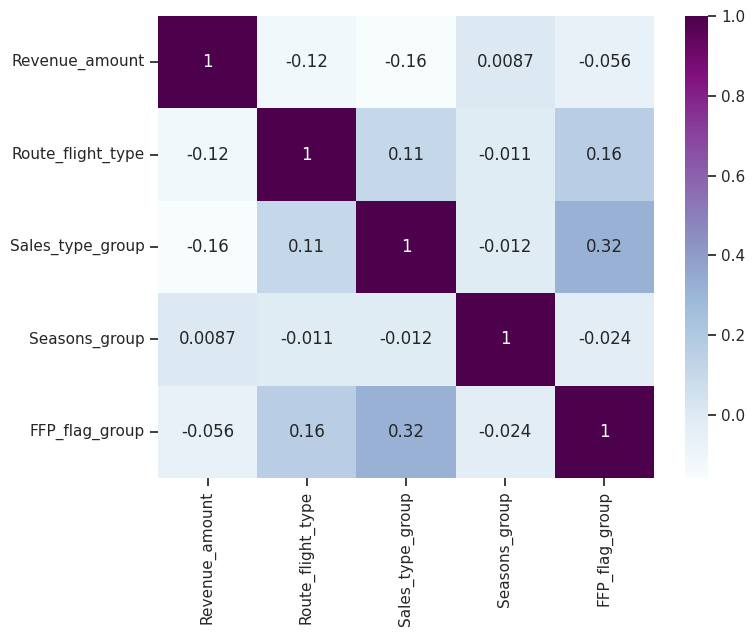

In [410]:
#построим тепловую карту на основе матрицы корреляций
corr_matrix = data_corr.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, linecolor='white', cmap="BuPu")
plt.show()

Вывод:

Изначально мы выделили и преобразовали в количественный признак несколько факторов, таких как: тип перелета, способ покупки, сезон и наличие программы лояльности. Из матрицы корреляций мы можем увидеть, что связь между выбранными признаками датасета слабая. По тепловой карте можно заметить, что выделяющихся показателей нет. Наибольшая связь наблюдается между факторами: наличие программы лояльности и способом оплаты.